## Wearable Health Device Performance Data June 2025 Visualization

# Import LIbrary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [3]:
df = pd.read_csv('/content/wearable_health_devices_performance_upto_26june2025.csv')
df.sample(n=5)

,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
1240,2025-06-14,Fitbit Inspire 4,Fitbit,Inspire 4,Fitness Tracker,102.32,114.0,93.84,95.50,75.42,IPX4,7.2,NaN,Bluetooth,9,Cross-platform,70.1
81,2025-06-02,Samsung Galaxy Watch Ultra,Samsung,Galaxy Watch Ultra,Smartwatch,291.19,39.5,94.97,96.19,79.22,5ATM,8.3,3.1,"WiFi, Bluetooth, NFC, LTE",8,Android/iOS,60.9
1944,2025-06-21,Garmin Venu 3,Garmin,Venu 3,Smartwatch,581.15,531.3,97.31,98.36,80.52,IPX8,8.8,1.8,"WiFi, Bluetooth, NFC",10,Cross-platform,66.2
115,2025-06-02,WHOOP 4.0,WHOOP,4.0,Fitness Band,30.00,131.0,90.09,93.52,77.34,3ATM,7.0,NaN,Bluetooth,2,Cross-platform,69.3
758,2025-06-09,Garmin Forerunner 965,Garmin,Forerunner 965,Smartwatch,170.56,718.3,93.43,98.58,82.93,IP68,6.6,3.4,"WiFi, Bluetooth, NFC, LTE",15,Cross-platform,61.2


# First EDA

In [ ]:
print(f'DataFrame Shape: {df.shape}')

DataFrame Shape: (2375, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Test_Date                        2375 non-null   object 
 1   Device_Name                      2375 non-null   object 
 2   Brand                            2375 non-null   object 
 3   Model                            2375 non-null   object 
 4   Category                         2375 non-null   object 
 5   Price_USD                        2375 non-null   float64
 6   Battery_Life_Hours               2375 non-null   float64
 7   Heart_Rate_Accuracy_Percent      2375 non-null   float64
 8   Step_Count_Accuracy_Percent      2375 non-null   float64
 9   Sleep_Tracking_Accuracy_Percent  2375 non-null   float64
 10  Water_Resistance_Rating          2375 non-null   object 
 11  User_Satisfaction_Rating         2375 non-null   float64
 12  GPS_Accuracy_Meters 

In [7]:
df.describe()

,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,1743.000000,2375.000000,2375.000000
mean,359.444484,160.584463,93.483907,95.910198,78.837516,7.966484,3.247676,8.912842,64.047621
std,215.671035,234.815896,3.172078,1.665484,4.843714,0.831801,1.022825,3.559990,5.109075
min,30.000000,18.000000,85.010000,93.000000,70.000000,6.000000,1.500000,2.000000,55.100000
25%,211.875000,46.900000,92.140000,94.550000,75.610000,7.400000,2.400000,6.000000,60.400000
50%,334.370000,99.800000,94.070000,95.950000,78.300000,8.000000,3.200000,9.000000,62.200000
75%,487.930000,177.400000,95.925000,96.960000,81.930000,8.500000,4.100000,12.000000,67.700000
max,989.480000,2118.100000,98.000000,99.500000,91.970000,9.500000,5.000000,15.000000,78.300000


# Price Comparison Per Model (US Dollar)

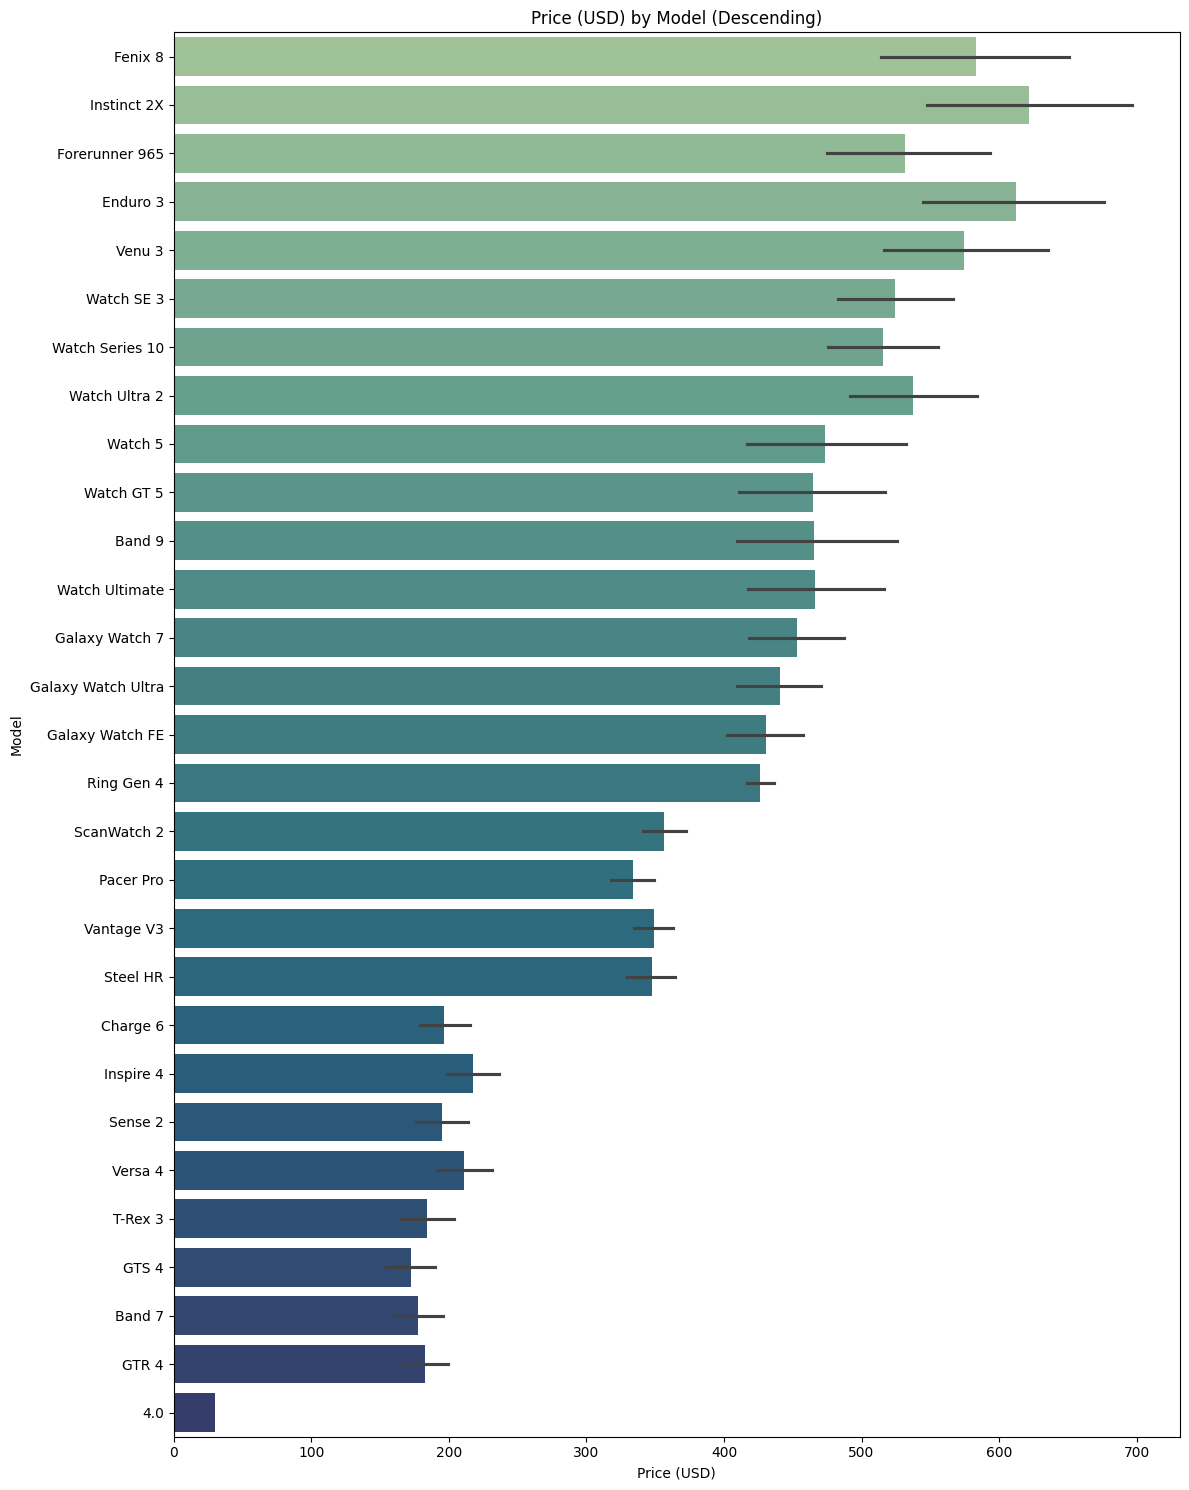

In [ ]:
# Sort the dataframe by Price_USD in descending order for better visualization
df_sorted_price = df.sort_values(by='Price_USD', ascending=False)

# Set a comfortable color palette
# Adjusting the palette based on the number of unique models for better visual distinction
palette_price = sns.color_palette("crest", len(df_sorted_price['Model'].unique()))

# Create the horizontal bar plot for Price_USD
plt.figure(figsize=(12, 15)) # Increase figure height to accommodate many models
sns.barplot(x='Price_USD', y='Model', data=df_sorted_price, palette=palette_price)
plt.title('Price (USD) by Model (Descending)')
plt.xlabel('Price (USD)')
plt.ylabel('Model')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Brand Distribution Barplot

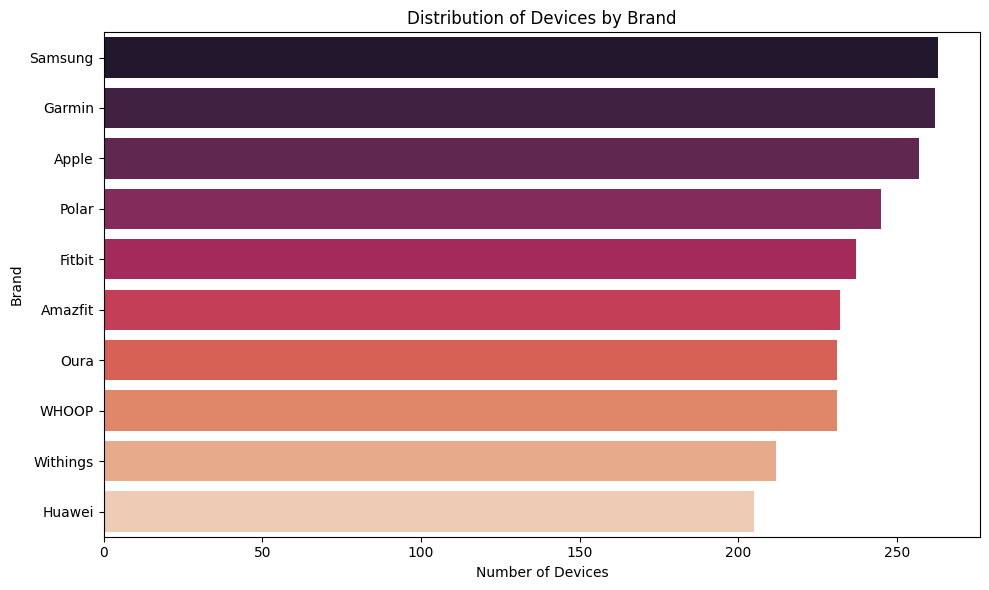

In [ ]:
df['Brand'].value_counts(ascending=True)

# Set a comfortable color palette
palette_brand = sns.color_palette("rocket", len(df['Brand'].unique()))

# Create the horizontal bar plot for Brand distribution
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index, palette=palette_brand)
plt.title('Distribution of Devices by Brand')
plt.xlabel('Number of Devices')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


# Model Distribution Barplot

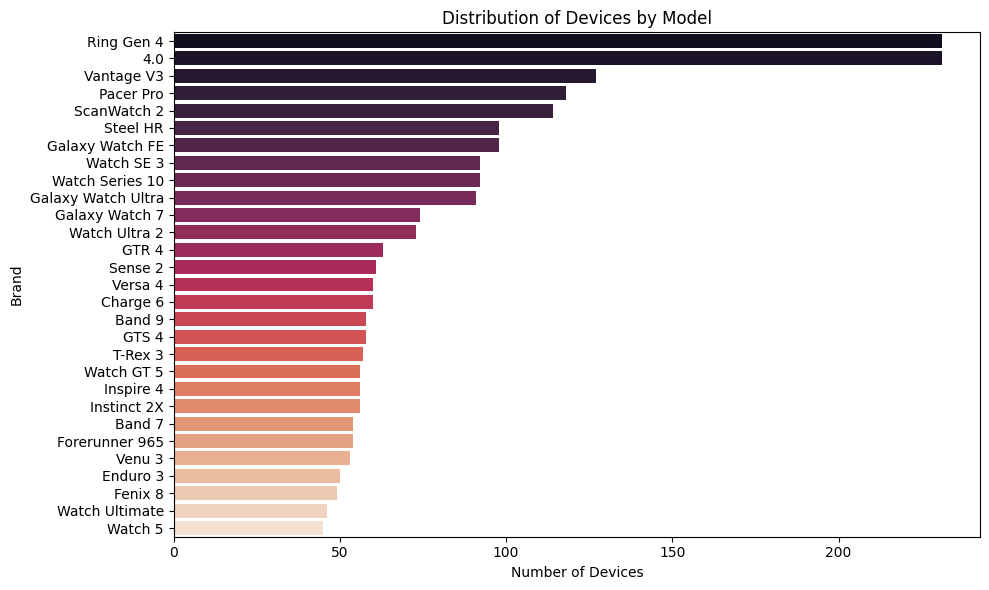

In [ ]:
df['Brand'].value_counts(ascending=True)

# Set a comfortable color palette
palette_brand = sns.color_palette("rocket", len(df['Model'].unique()))

# Create the horizontal bar plot for Brand distribution
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.countplot(y='Model', data=df, order=df['Model'].value_counts().index, palette=palette_brand)
plt.title('Distribution of Devices by Model')
plt.xlabel('Number of Devices')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


# Battery Life Hours

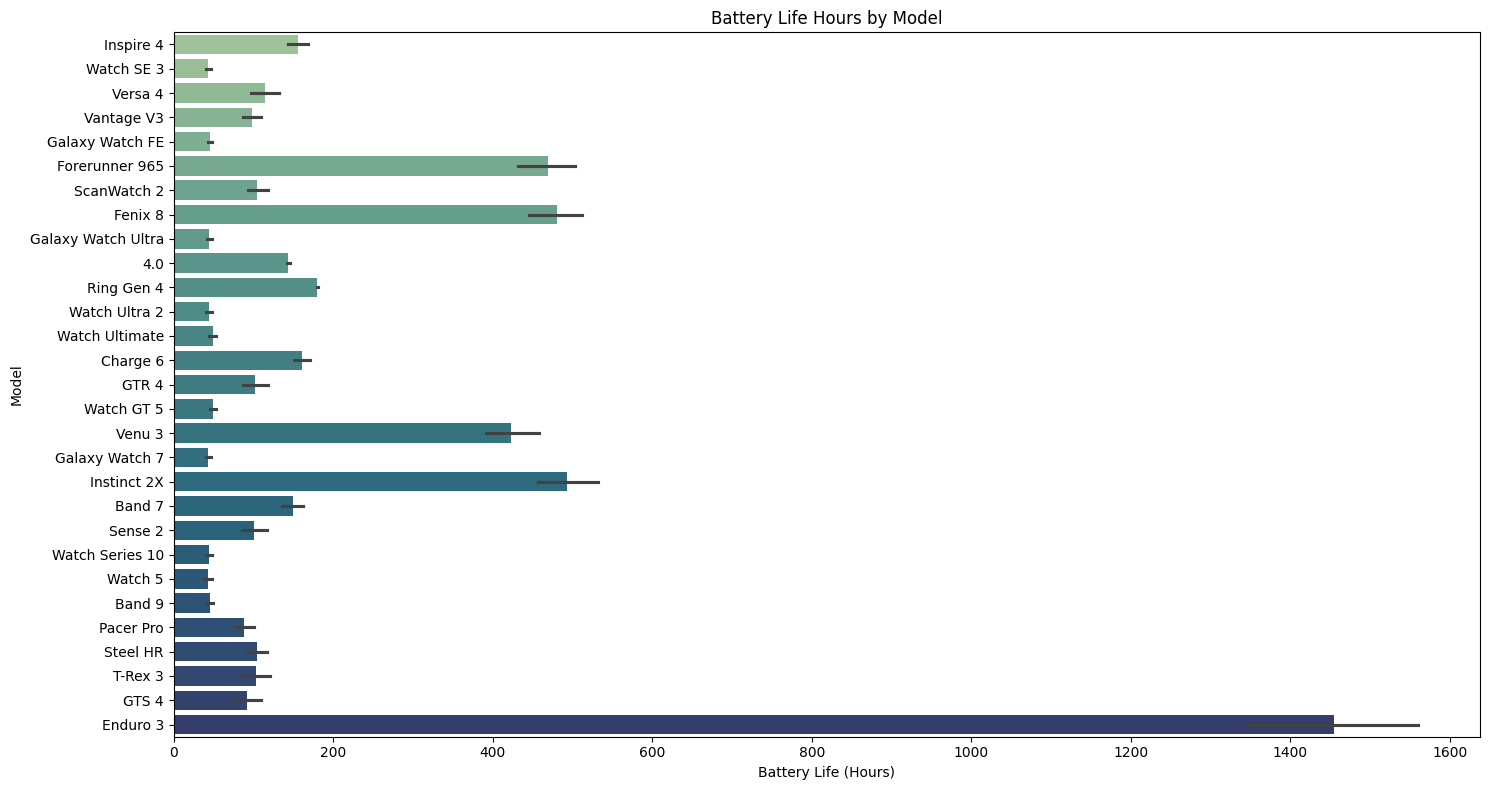

In [5]:
# Visualize Battery Life Hours by Model with vertical bars
plt.figure(figsize=(15, 8)) # Adjust figure size for better readability
sns.barplot(x='Battery_Life_Hours', y='Model', data=df, palette='crest')
plt.title('Battery Life Hours by Model')
plt.xlabel('Battery Life (Hours)')
plt.ylabel('Model')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# Key Performance Metrics: Accuracy and User Satisfaction

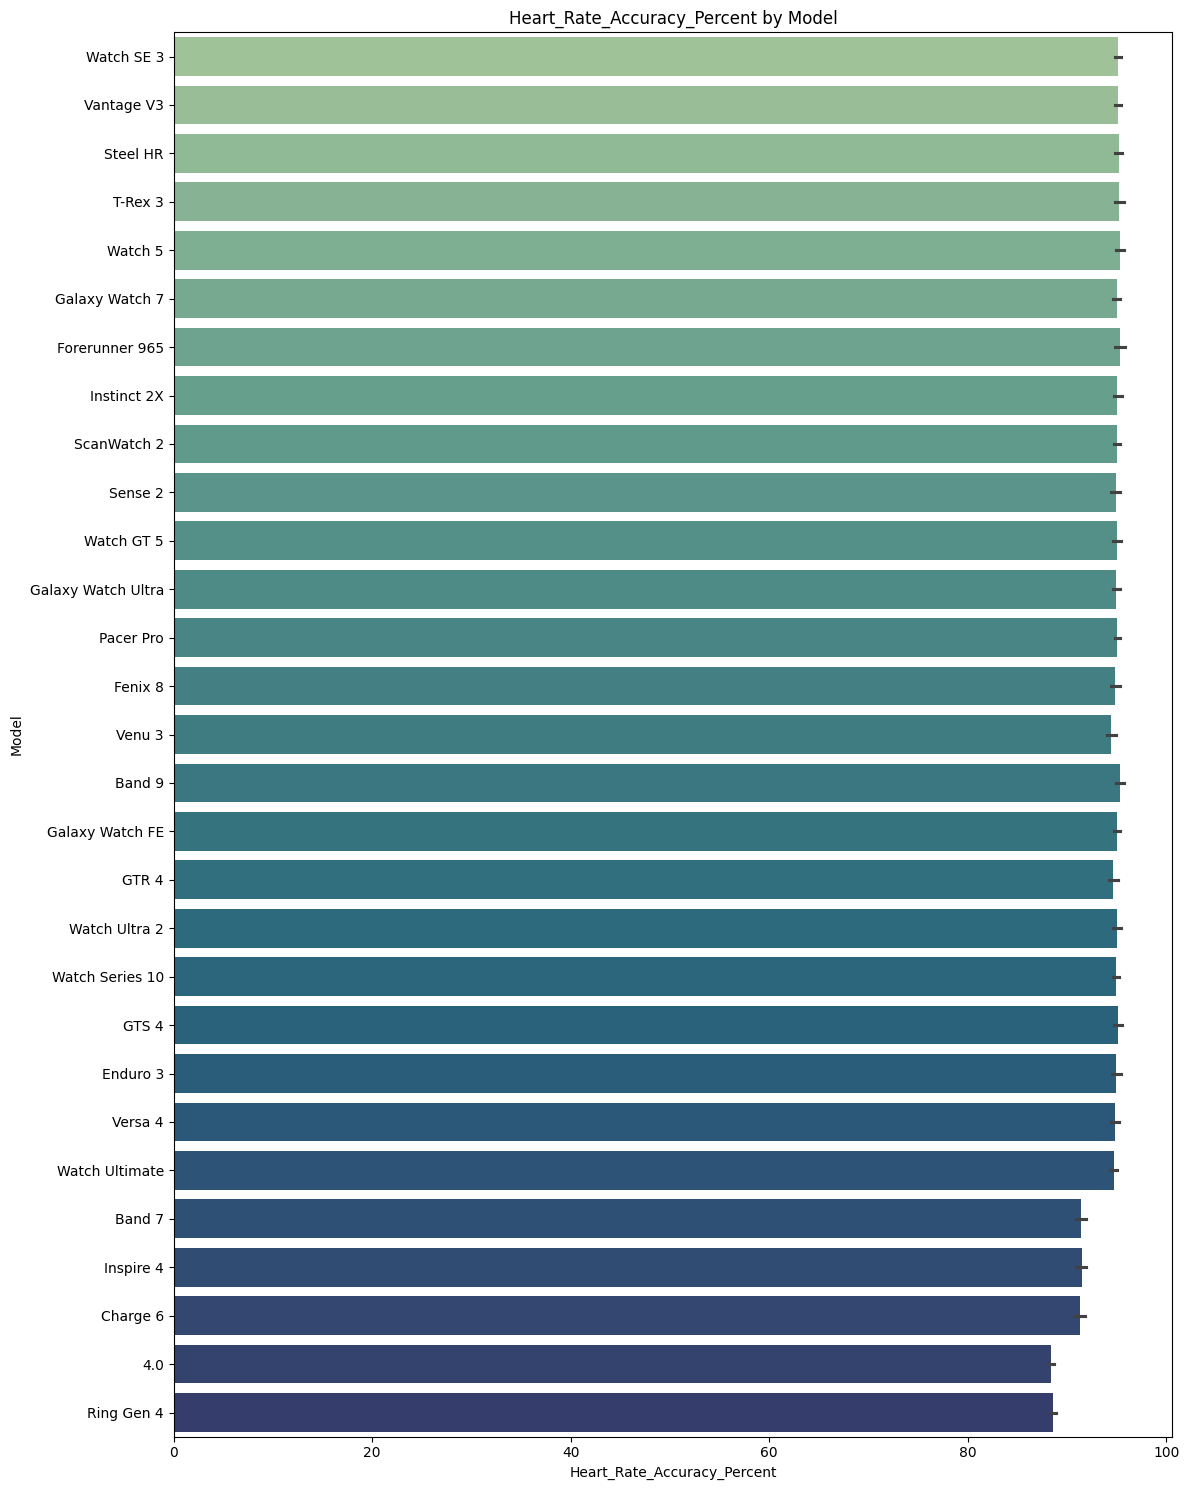

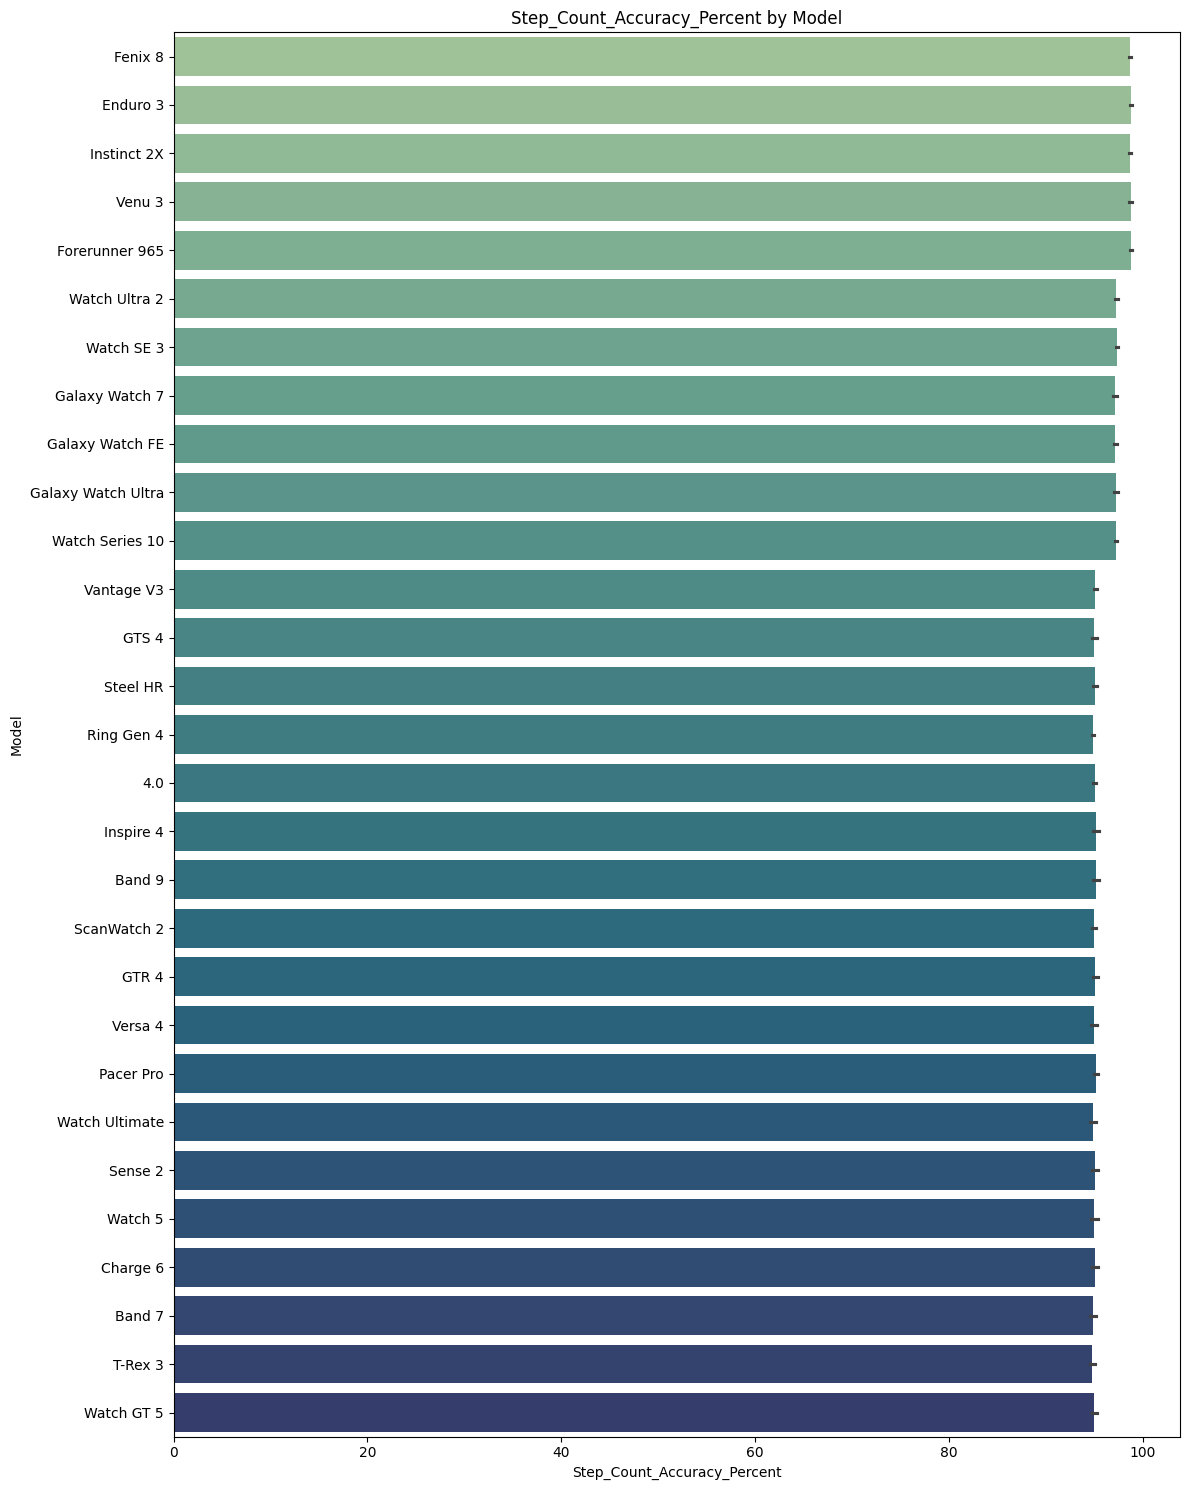

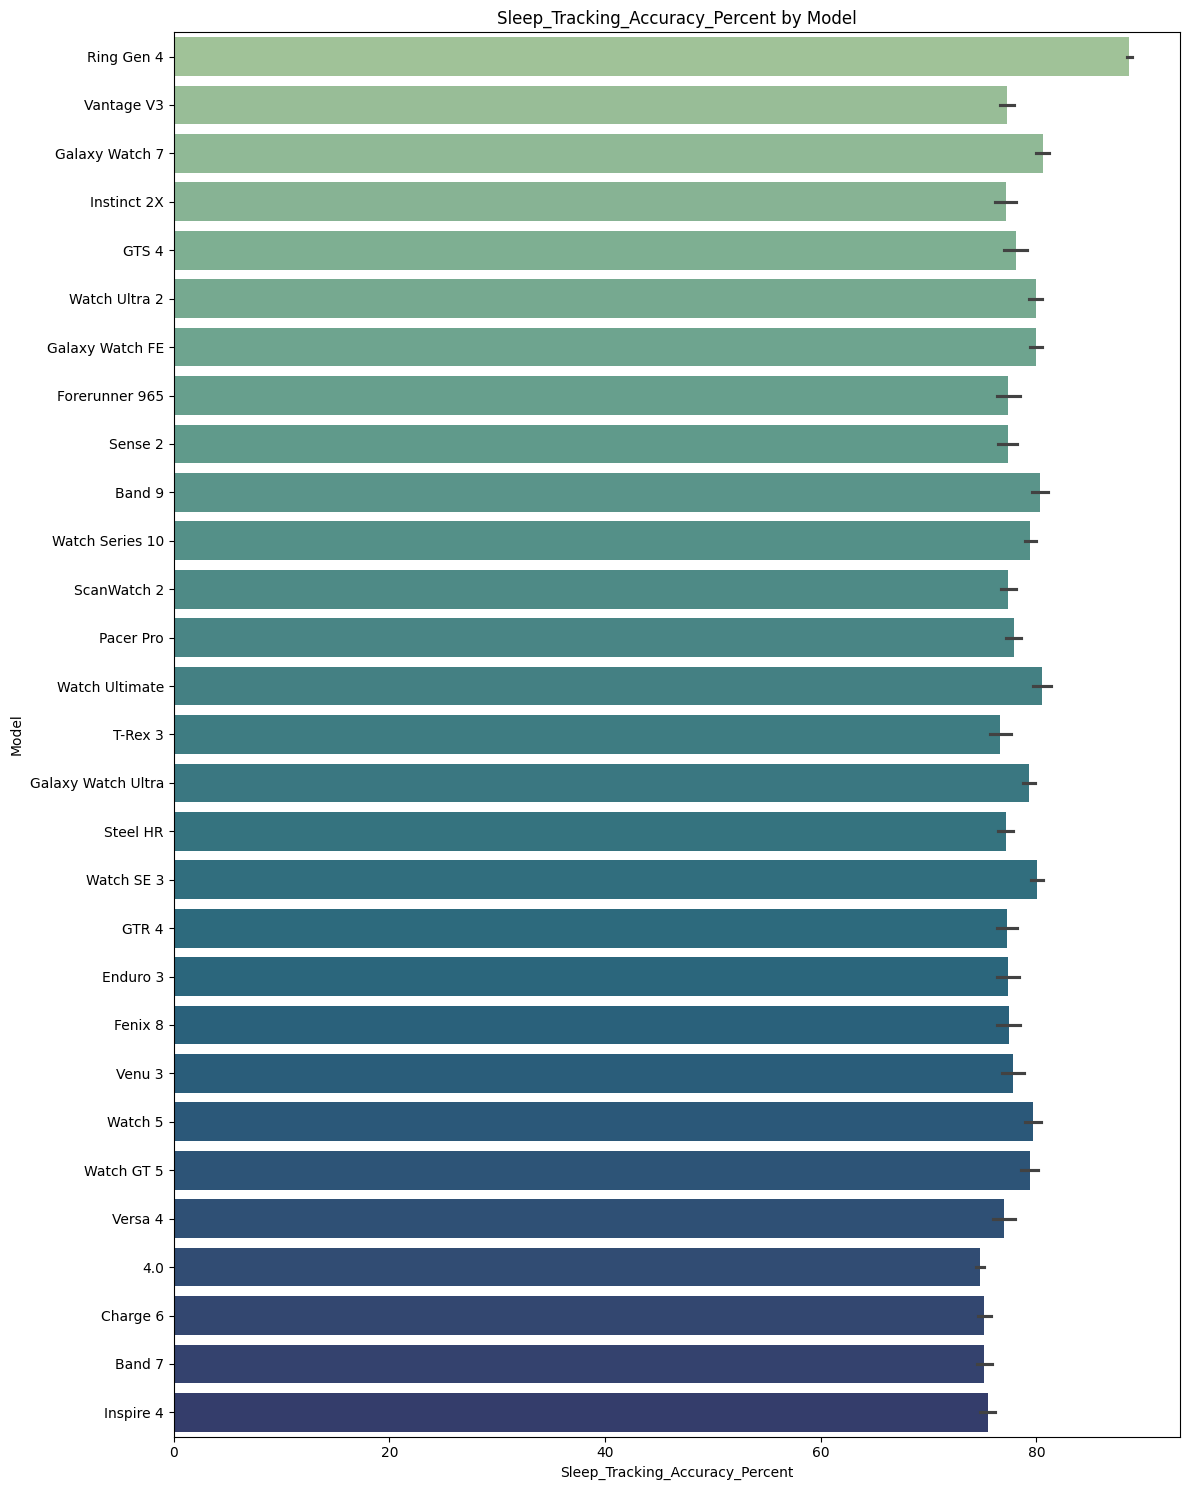

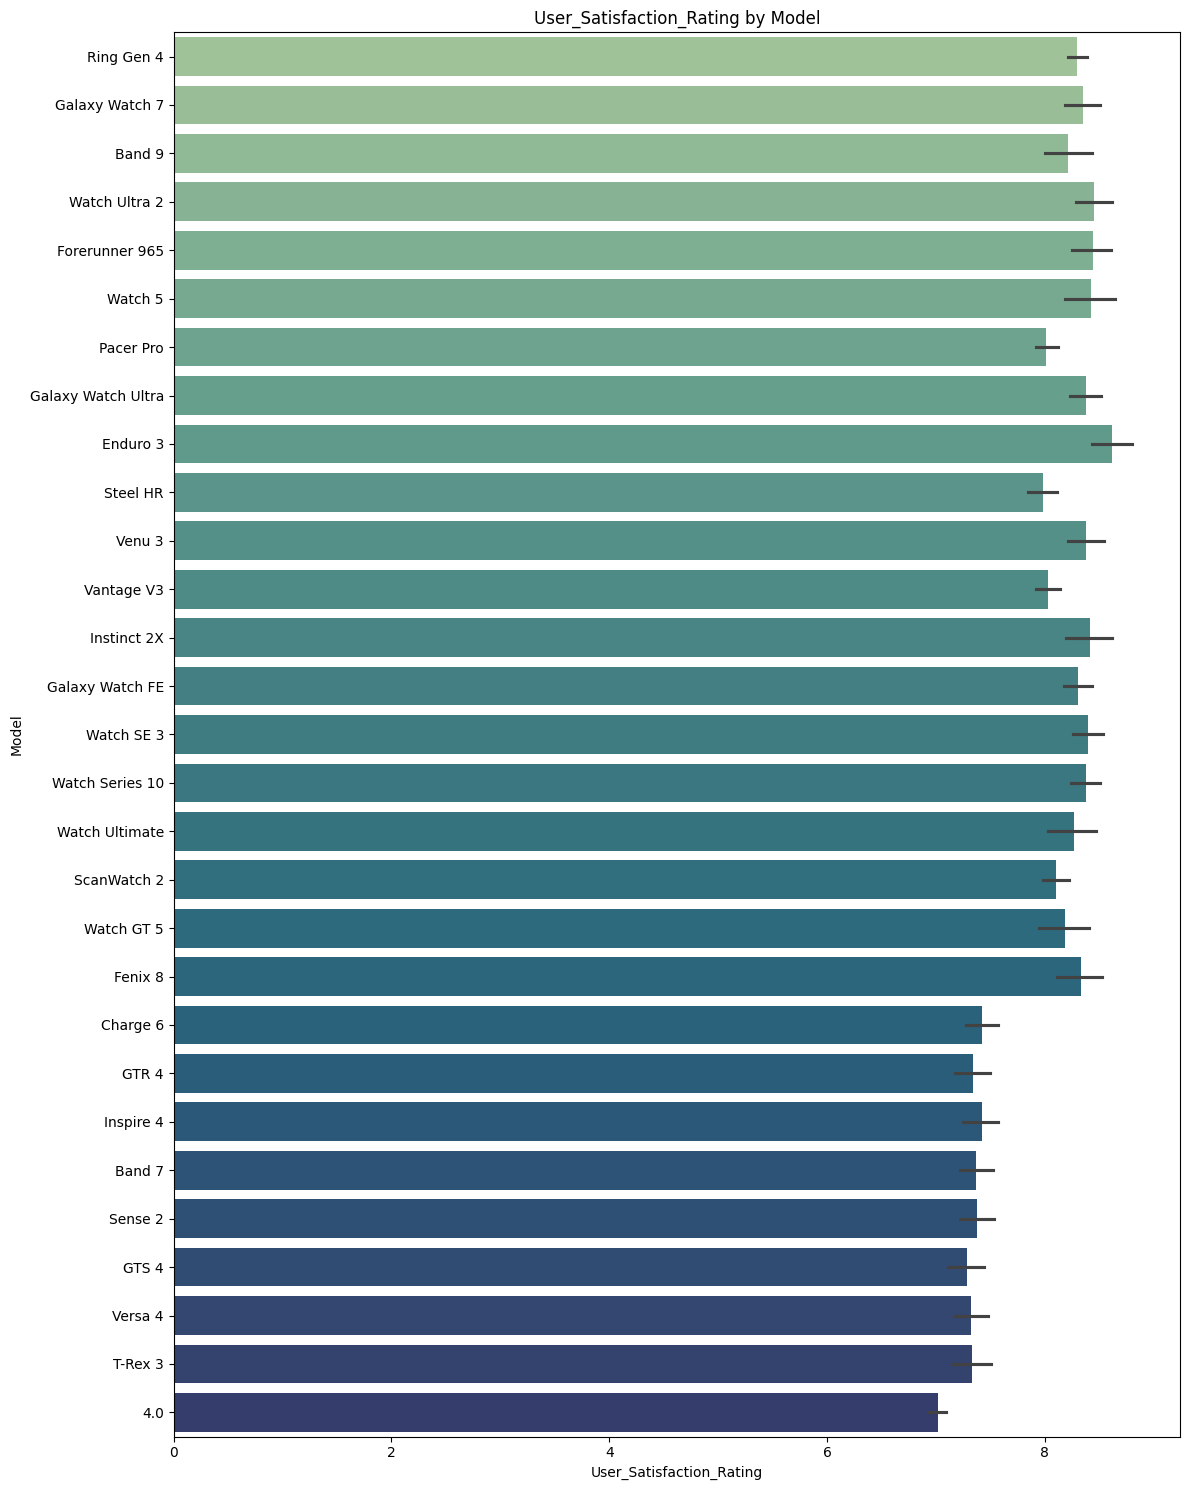

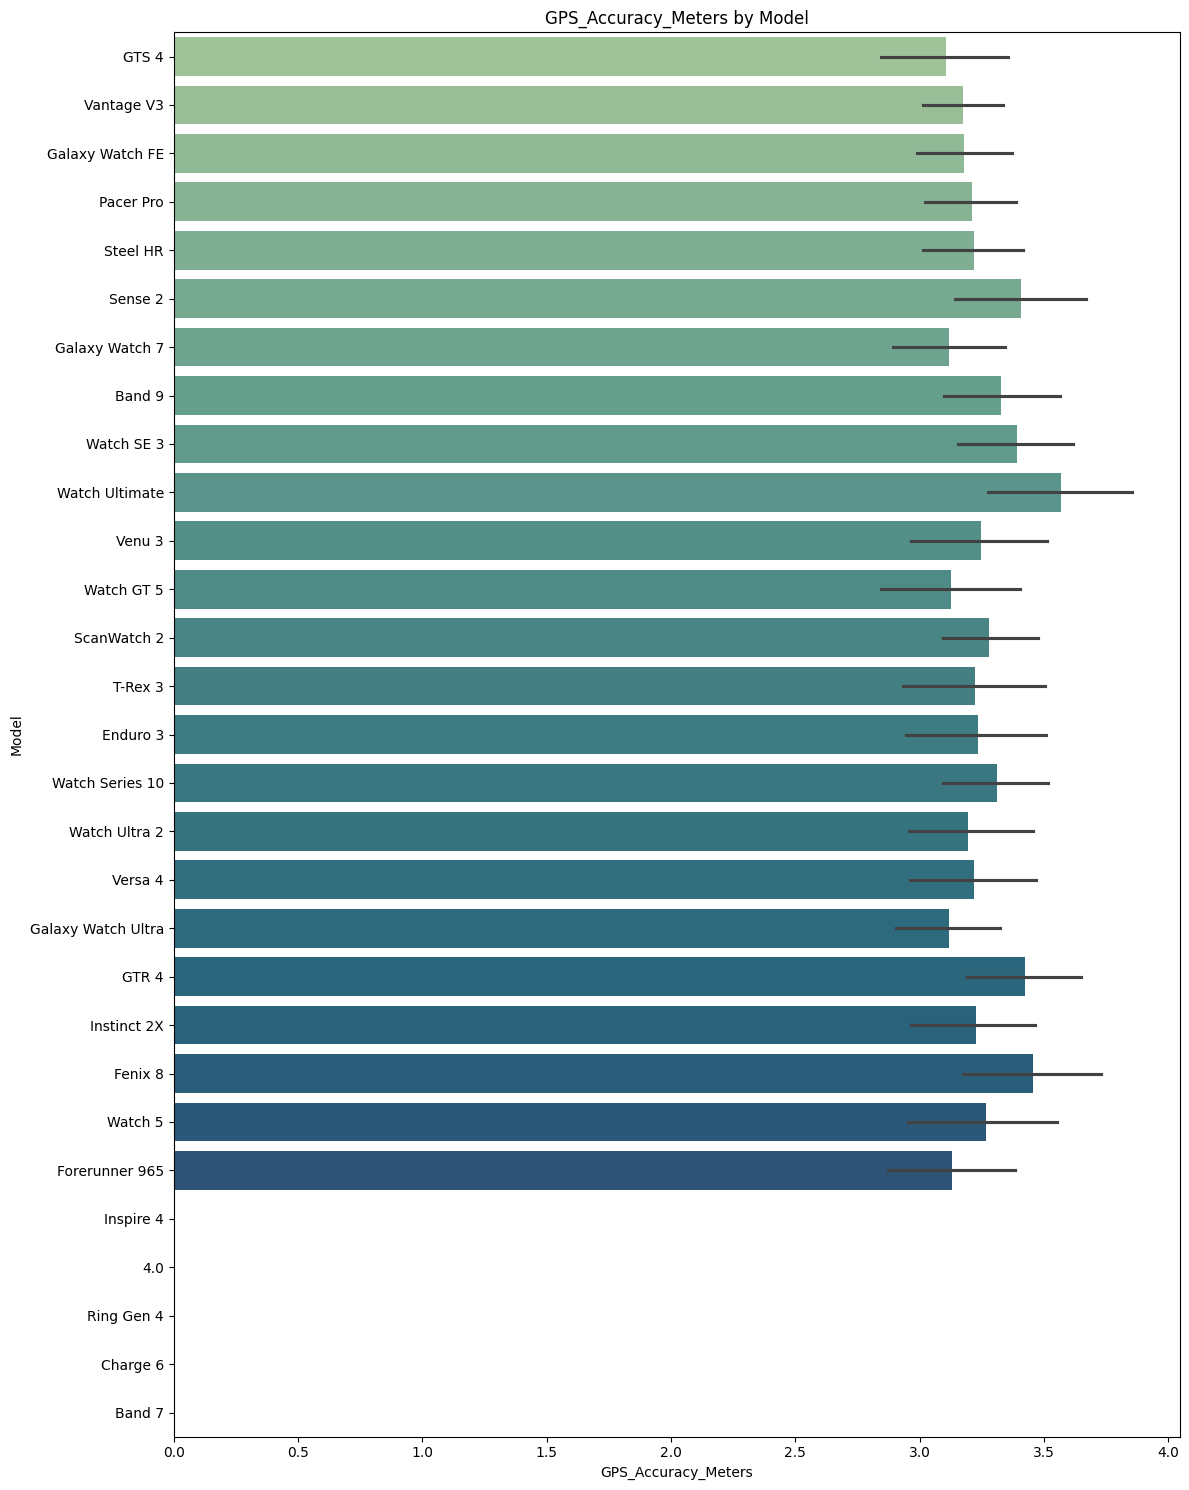

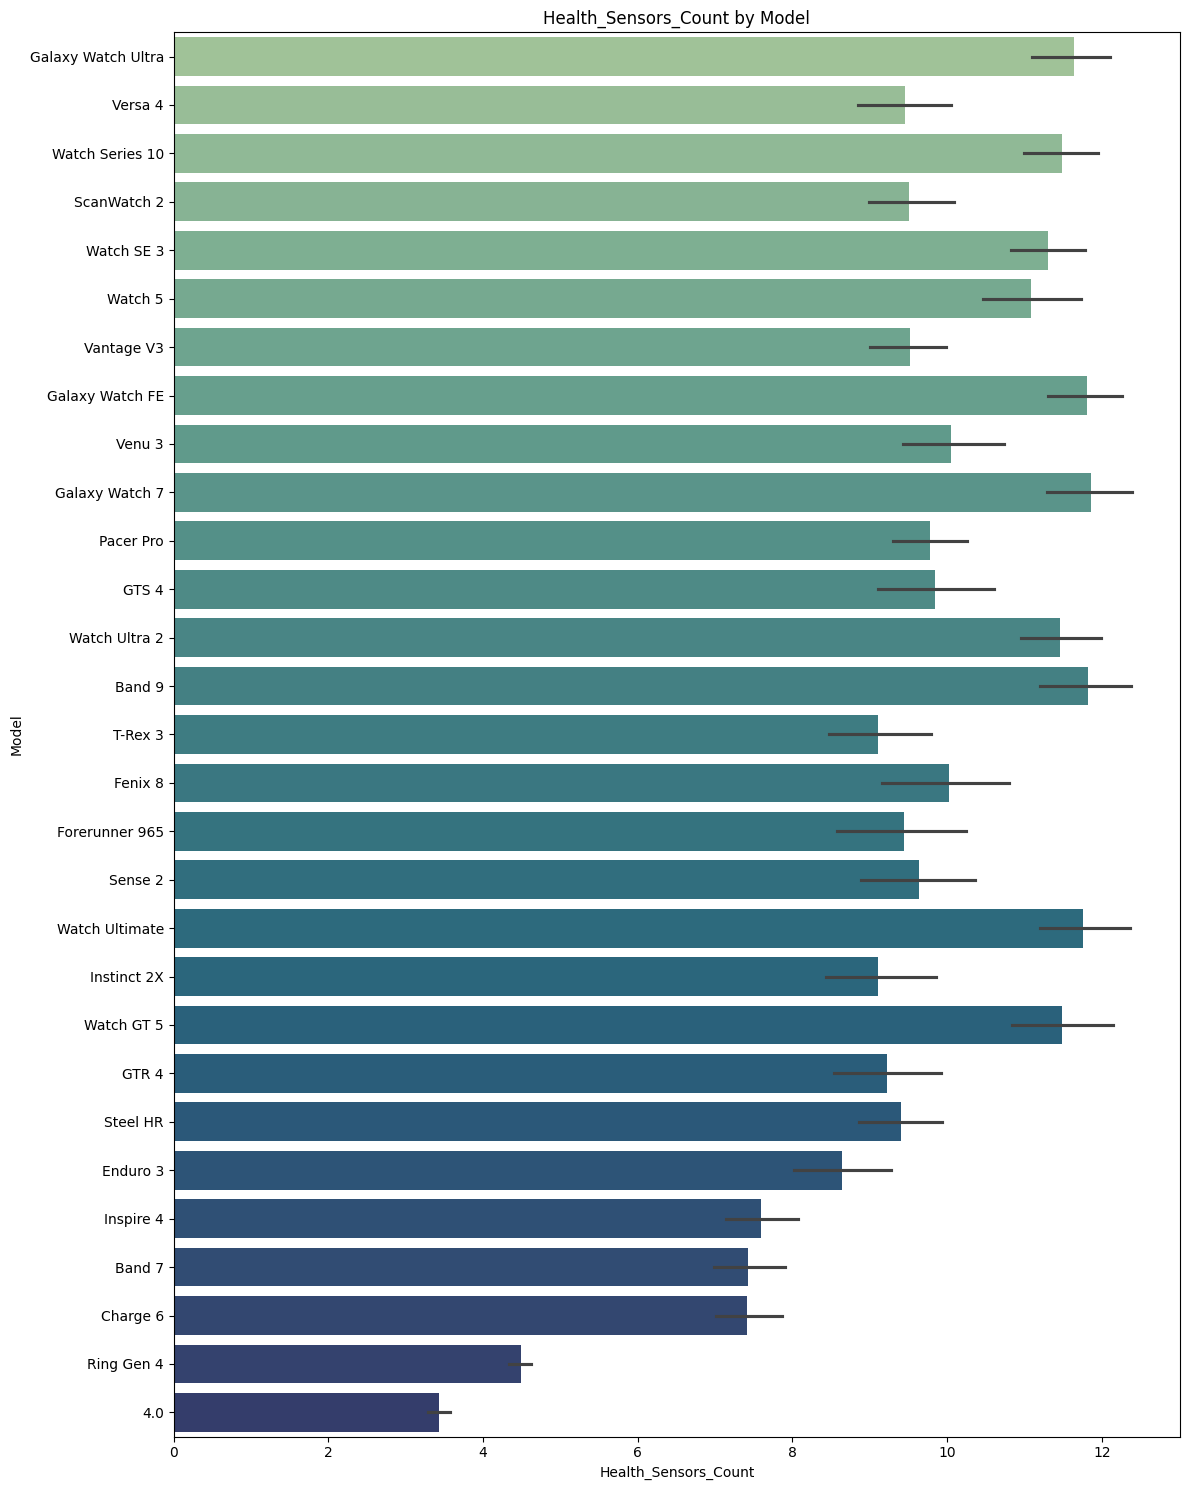

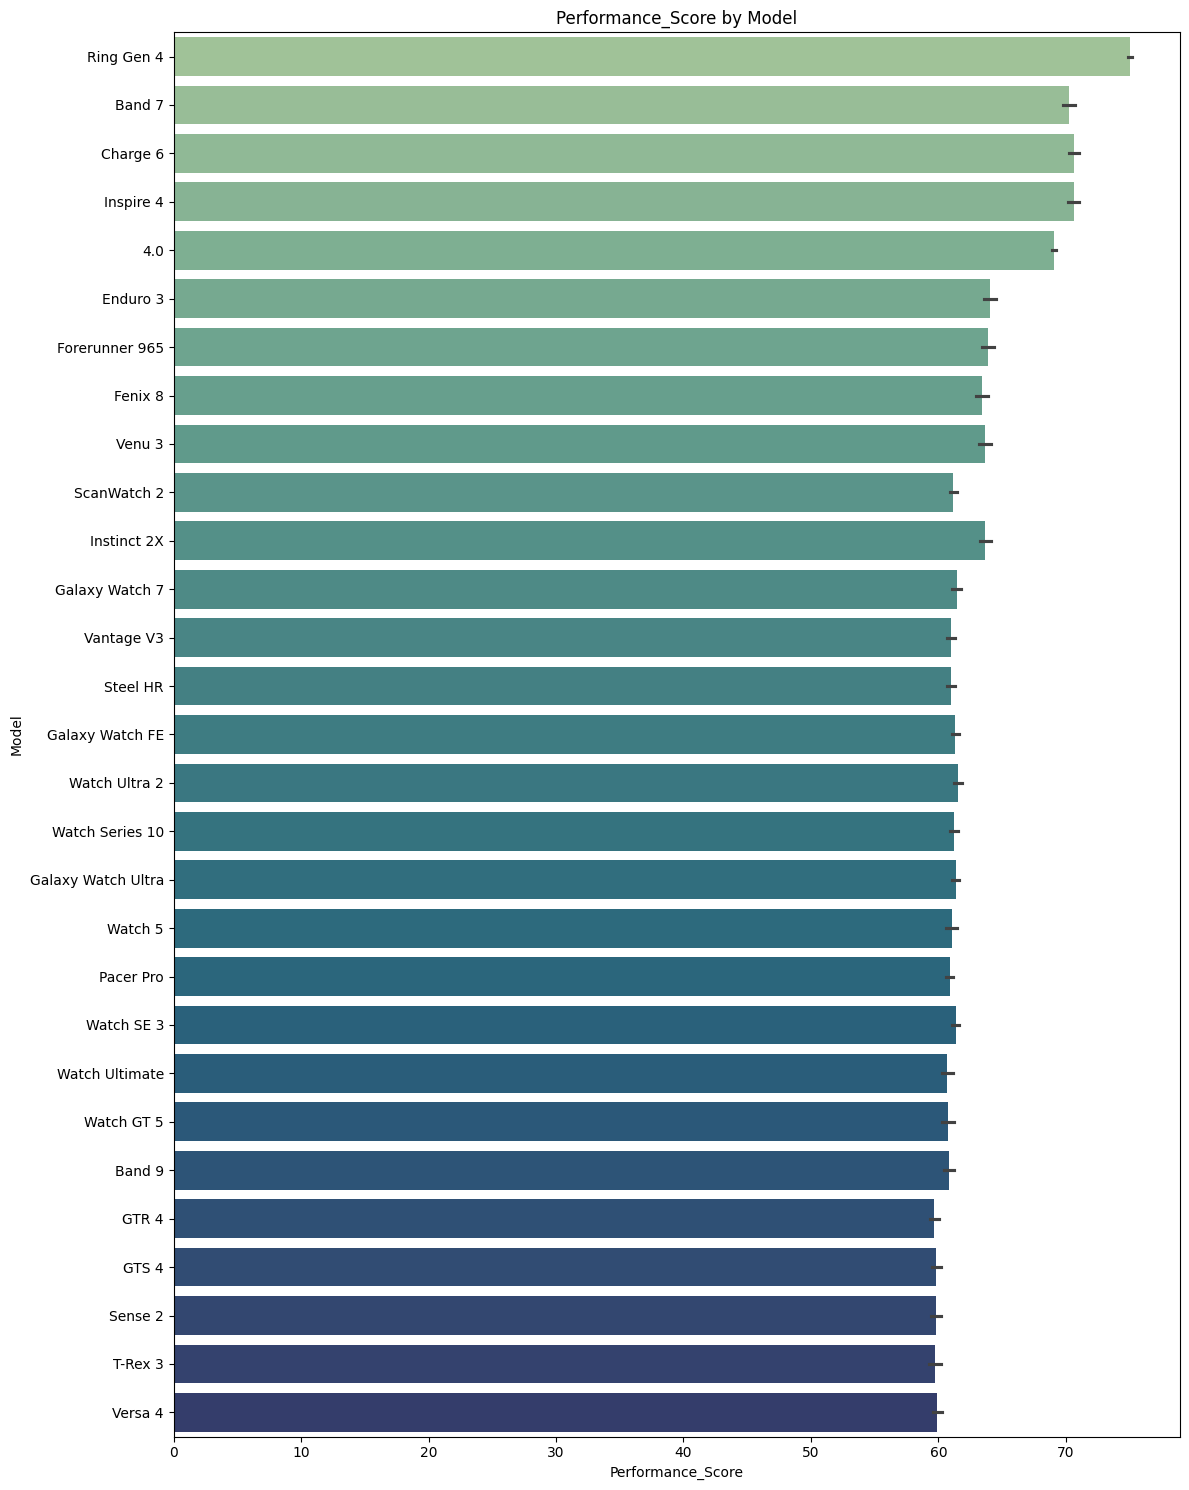

In [23]:
# List of columns to visualize
columns_to_visualize = [
    'Heart_Rate_Accuracy_Percent',
    'Step_Count_Accuracy_Percent',
    'Sleep_Tracking_Accuracy_Percent',
    'User_Satisfaction_Rating',
    'GPS_Accuracy_Meters',
    'Health_Sensors_Count',
    'Performance_Score',
]

# Loop through each column and create a horizontal bar plot
for col in columns_to_visualize:
    plt.figure(figsize=(12, 15)) # Adjust figure size for better readability
    # Sort by the current column for better visualization
    df_sorted = df.sort_values(by=col, ascending=False)
    sns.barplot(x=col, y='Model', data=df_sorted, palette='crest')
    plt.title(f'{col} by Model')
    plt.xlabel(col)
    plt.ylabel('Model')
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

# Heatmap

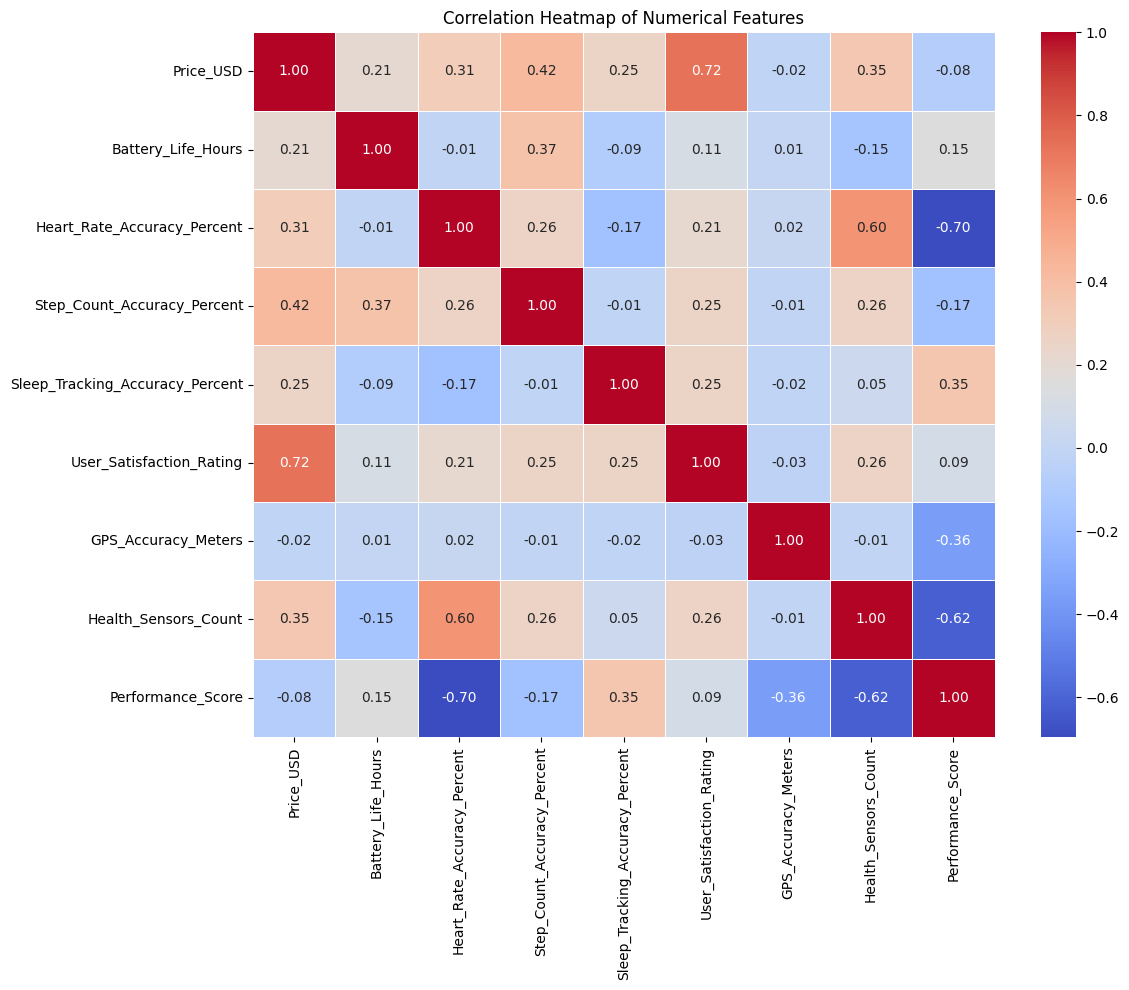

In [11]:
# Select numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Relationship between Price nd Performance Score

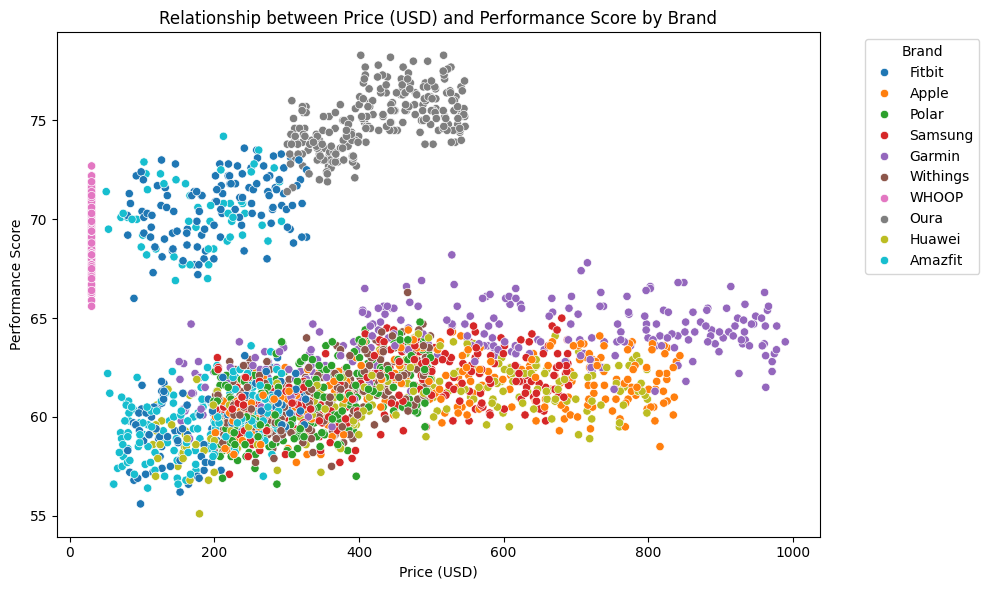

In [25]:
# Create a scatter plot for the relationship between Price_USD and Performance_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_USD', y='Performance_Score', hue='Brand', data=df)
plt.title('Relationship between Price (USD) and Performance Score by Brand')
plt.xlabel('Price (USD)')
plt.ylabel('Performance Score')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left') # Position legend outside the plot
plt.tight_layout()
plt.show()